# Центральная предельная теорема своими руками

Для данного примера выберем бетта распределение с параметрами альфа и бэта 0.5, т.к. оно очень не похоже на нормальное

In [41]:
from scipy.stats import beta
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

alpha_p = beta_p = 0.5

Построим гистограмму из 1000 элементов и сравним с нормальным распределением

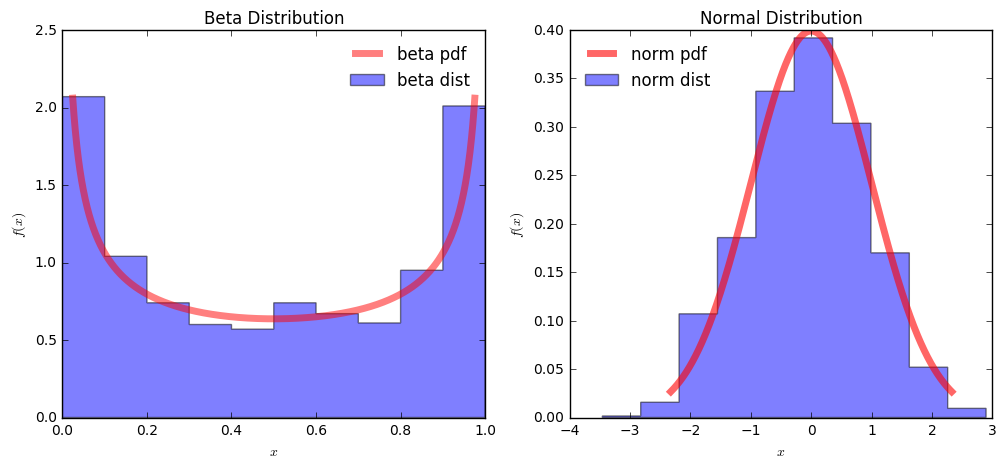

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
n = 1000

# бэта плотность рапределения
x1 = np.linspace(beta.ppf(0.1, alpha_p, beta_p), beta.ppf(0.9, alpha_p, beta_p), n)
ax1.plot(x1, beta.pdf(x1, alpha_p, beta_p), 'r', lw=5, alpha=0.5, label='beta pdf')

# гистограмма данных для бэта распределения
data1 = beta.rvs(alpha_p, beta_p, size=n)
ax1.hist(data1, normed=True, histtype='stepfilled', alpha=0.5, label='beta dist')

ax1.legend(loc='best', frameon=False)
ax1.set_title('Beta Distribution')
ax1.set_ylabel('$f(x)$')
ax1.set_xlabel('$x$')

# нормальная плотность рапределения
x2 = np.linspace(norm.ppf(0.01), norm.ppf(0.99), n)
ax2.plot(x2, norm.pdf(x2), 'r-', lw=5, alpha=0.6, label='norm pdf')

# гистограмма данных для нормального распределения
data2 = norm.rvs(size=n)
ax2.hist(data2, normed=True, histtype='stepfilled', alpha=0.5, label='norm dist')

ax2.legend(loc='best', frameon=False)
ax2.set_title('Normal Distribution')
ax2.set_ylabel('$f(x)$')
ax2.set_xlabel('$x$')

plt.show()

Как видно из рисунка, распределения явно отличаются

Теперь сделаем функцию для генерации выборок заданного размера из средних

In [43]:
# size_of_sample - количество элементов в выборке
# samples_count - количество выборок
# a и b - альфа и бэта параметры распределения
def generate_mean_sample(size_of_sample=100, samples_count=1000, a=0.5, b=0.5):
    result = []
    for i in range(1, samples_count + 1):
        data = beta.rvs(a, b, size=size_of_sample)
        mean = np.mean(data)
        result.append(mean)
    return result

Теперь построим гистограммы распределений выборочных средних с графиками нормального распределения. Параметры для когорого мы пощитаем на основе параметровбэта распределения

## $$\overline{X}_n \approx\sim N(EX,\frac{DX}{n}) $$

Подставив значения для матожидания и дисперсии для бэта распределения, получим

## $$\overline{X}_n \approx\sim N(\frac{\alpha}{\alpha+\beta} , \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)n}) $$

In [44]:
# ax - объект графика
# samples - количество элементов в выборке для метода generate_mean_sample
def draw_subplot(ax, sample_size):
    mu = alpha_p / (alpha_p + beta_p)
    sigma = alpha_p * beta_p / ((alpha_p + beta_p) ** 2 * (alpha_p + beta_p + 1) * sample_size)

    # гистограмма из средних
    beta_means = generate_mean_sample(size_of_sample=sample_size)
    ax.hist(beta_means, normed=True, histtype='stepfilled', alpha=0.5, label='beta means')

    # нормальная плотность рапределения
    norm_dist = norm(loc=mu, scale=np.sqrt(sigma))
    x2 = np.linspace(norm_dist.ppf(0.01), norm_dist.ppf(0.99), n)
    ax.plot(x2, norm_dist.pdf(x2), 'r-', lw=5, alpha=0.6, label='norm pdf')

    ax.legend(loc='upper right', frameon=False)
    ax.set_title(sample_size)
    ax.set_ylabel('f(x)')
    ax.set_xlabel('means frequency')

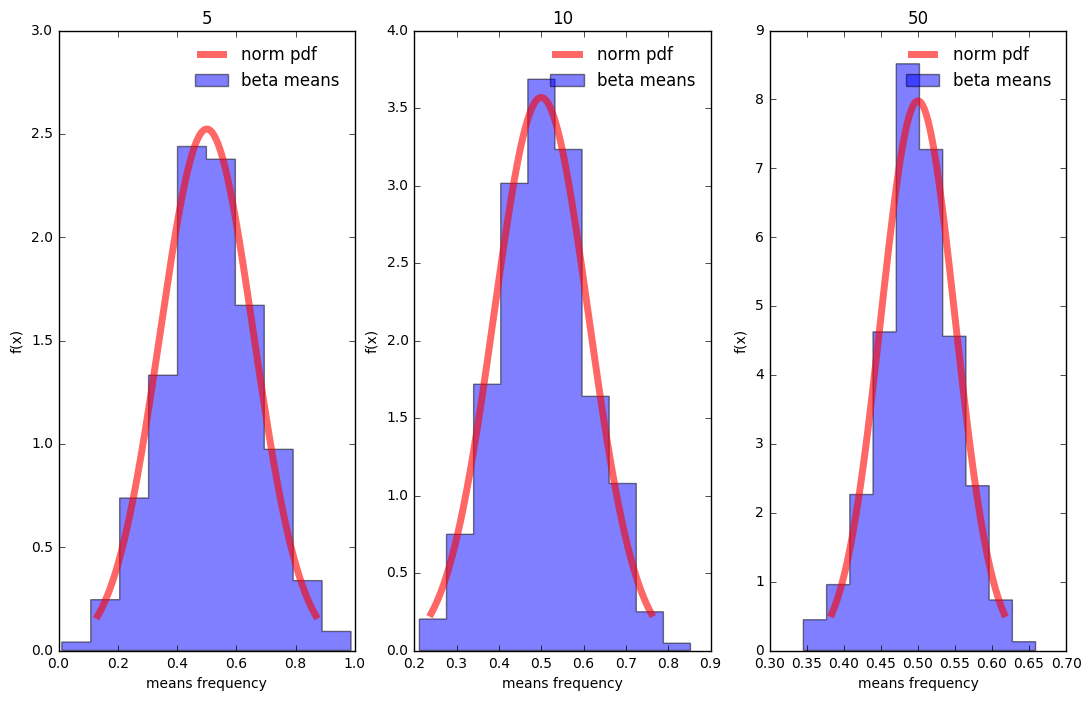

In [45]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 8))
draw_subplot(ax1, 5)
draw_subplot(ax2, 10)
draw_subplot(ax3, 50)
plt.show()

## Заключение

Распределение матожидания бэта распределения приближается к нормальному при увеличении размера выборки.